In [ ]:
#Lab 4 Naive Bayes Classification [Gaussian & MultiNomial]
#Dataset Chosen -> Spotify Dataset

In [1]:
#Pre-requisites
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

#Load Dataset
df = pd.read_csv("songs_normalize.csv")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-n

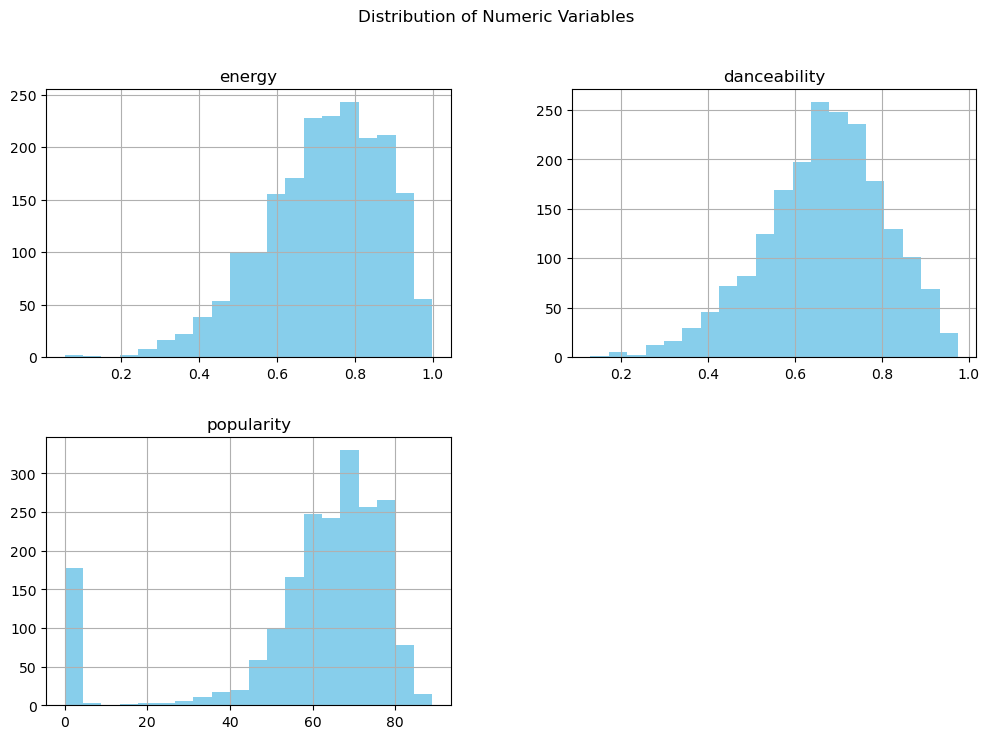

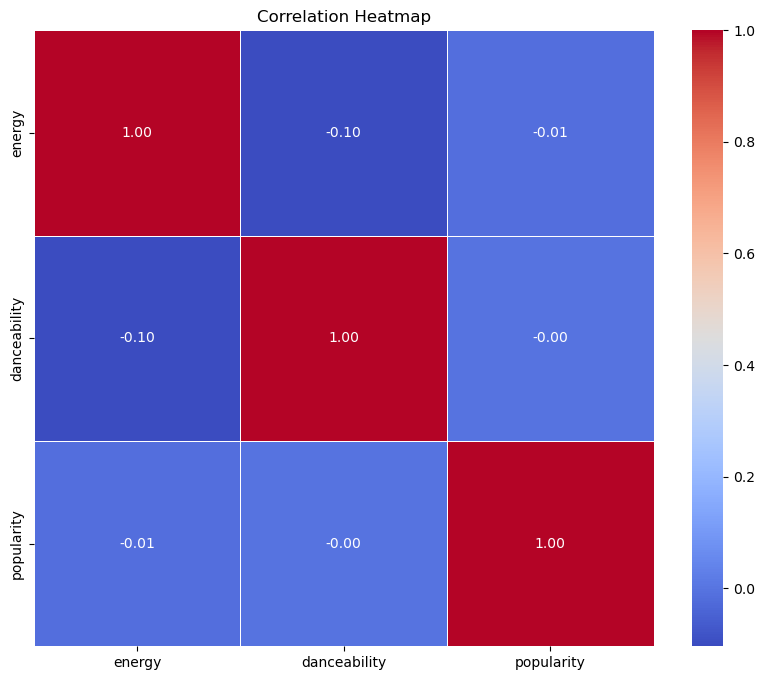

C:\Users\offic\AppData\Local\Temp\ipykernel_27188\3031807007.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='key', data=df, palette='viridis')


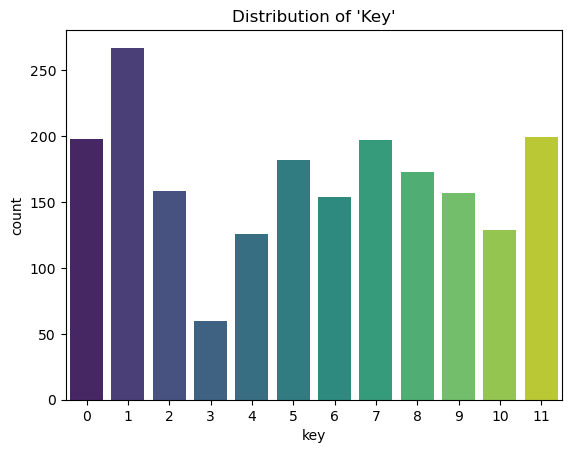

In [2]:
#1. Detailed EDA

#General Information
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

#Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

#Distribution of Numeric Variables
numeric_cols = ['energy', 'danceability', 'popularity']
df[numeric_cols].hist(figsize=(12, 8), bins=20, color='skyblue')
plt.suptitle("Distribution of Numeric Variables")
plt.show()

#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#Distribution of Nominal Variables (e.g., Key or Mode)
sns.countplot(x='key', data=df, palette='viridis')
plt.title("Distribution of 'Key'")
plt.show()

In [3]:
#2. Prepare Data

#Select Features and Target
#Using `energy` and `danceability` as features and creating binary target from `popularity`
df['popularity_binary'] = (df['popularity'] > df['popularity'].median()).astype(int)
X = df[['energy', 'danceability']].values
y = df['popularity_binary'].values

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
#3. Train Gaussian Naive Bayes Classifier

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

#Predictions
y_pred_gnb = gnb.predict(X_test_scaled)

In [5]:
#4. Train Multinomial Naive Bayes Classifier

#Min-Max Scaling for MultinomialNB
min_max_scaler = MinMaxScaler()
X_train_mm_scaled = min_max_scaler.fit_transform(X_train)  # Scale train data
X_test_mm_scaled = min_max_scaler.transform(X_test)  # Scale test data

#Train Multinomial Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_mm_scaled, y_train)

#Predictions
y_pred_mnb = mnb.predict(X_test_mm_scaled)

In [6]:
#5. Check Accuracy Score

print("\nAccuracy Scores:")
print(f"Gaussian Naive Bayes: {accuracy_score(y_test, y_pred_gnb):.2f}")
print(f"Multinomial Naive Bayes: {accuracy_score(y_test, y_pred_mnb):.2f}")


Accuracy Scores:
Gaussian Naive Bayes: 0.49
Multinomial Naive Bayes: 0.48



Cross-Validation Scores:
Gaussian Naive Bayes: [0.546875 0.528125 0.490625 0.49375  0.575   ]
Mean CV Accuracy (Gaussian): 0.53
Multinomial Naive Bayes: [0.559375 0.53125  0.50625  0.534375 0.540625]
Mean CV Accuracy (Multinomial): 0.53

Confusion Matrices:


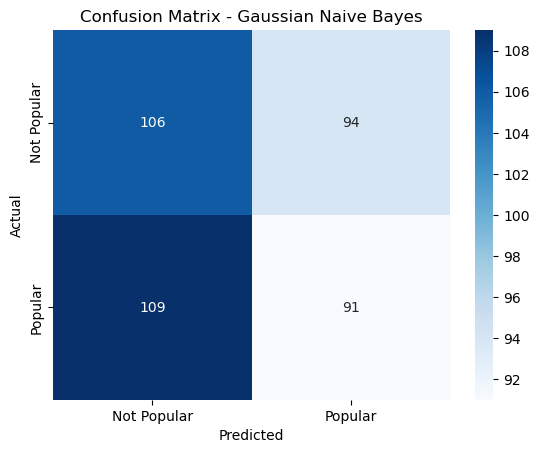

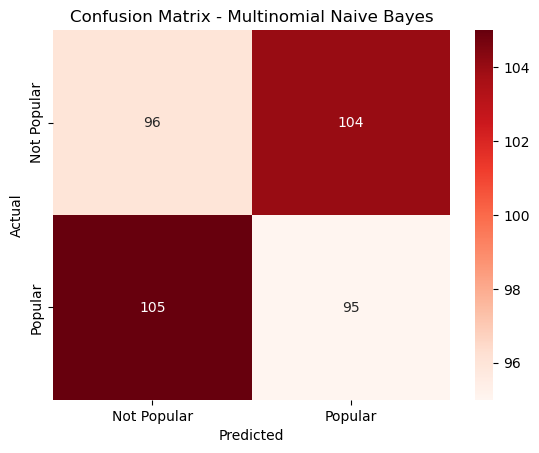

In [7]:
#6. Confusion Matrix with Cross Validation

cv_scores_gnb = cross_val_score(gnb, X_train_mm_scaled, y_train, cv=5)
cv_scores_mnb = cross_val_score(mnb, X_train_mm_scaled, y_train, cv=5)

print("\nCross-Validation Scores:")
print(f"Gaussian Naive Bayes: {cv_scores_gnb}")
print(f"Mean CV Accuracy (Gaussian): {cv_scores_gnb.mean():.2f}")
print(f"Multinomial Naive Bayes: {cv_scores_mnb}")
print(f"Mean CV Accuracy (Multinomial): {cv_scores_mnb.mean():.2f}")

#Confusion Matrix
print("\nConfusion Matrices:")
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

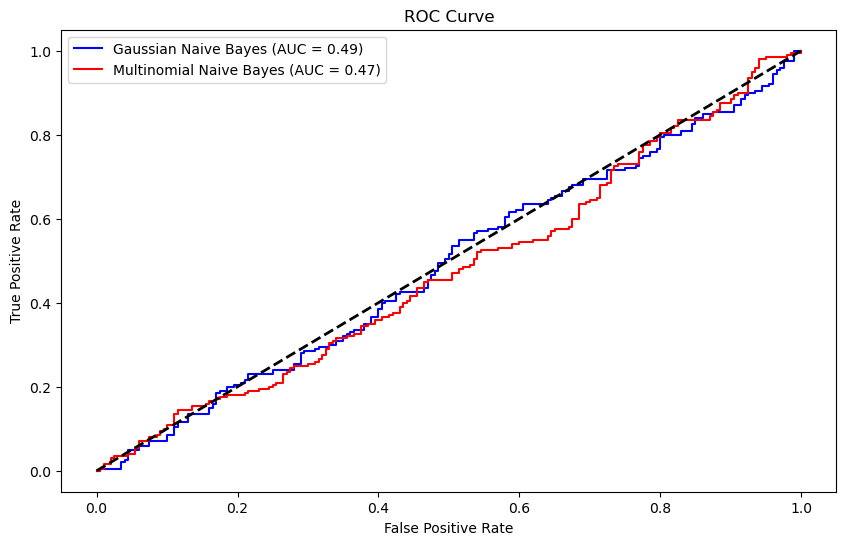

In [ ]:
#7. ROC Curve [Receiver Operating Characteristic]

#Compute ROC Curve and AUC [Area Under the Curve]
y_pred_prob_gnb = gnb.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_mnb = mnb.predict_proba(X_test_scaled)[:, 1]

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_prob_gnb)
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_pred_prob_mnb)

roc_auc_gnb = roc_auc_score(y_test, y_pred_prob_gnb)
roc_auc_mnb = roc_auc_score(y_test, y_pred_prob_mnb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f"Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})", color="blue")
plt.plot(fpr_mnb, tpr_mnb, label=f"Multinomial Naive Bayes (AUC = {roc_auc_mnb:.2f})", color="red")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [9]:
#8. Interpretation

print("\n--- Interpretation ---")
print(f"Gaussian Naive Bayes achieved an accuracy of {accuracy_score(y_test, y_pred_gnb):.2f} with an AUC of {roc_auc_gnb:.2f}.")
print(f"Multinomial Naive Bayes achieved an accuracy of {accuracy_score(y_test, y_pred_mnb):.2f} with an AUC of {roc_auc_mnb:.2f}.")
print("Gaussian Naive Bayes performs better with continuous numerical features, while Multinomial Naive Bayes may not be that suitable for this dataset.")


--- Interpretation ---
Gaussian Naive Bayes achieved an accuracy of 0.49 with an AUC of 0.49.
Multinomial Naive Bayes achieved an accuracy of 0.48 with an AUC of 0.47.
Gaussian Naive Bayes performs better with continuous numerical features, while Multinomial Naive Bayes may not be that suitable for this dataset.


In [ ]:
#Arjun Ajithan Nadukandiyil
#2241119
#6BCA B